## Importing Required Libraries

In [515]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
import sklearn.metrics as mt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [516]:
data = pd.read_csv("insurance.csv")
df = data.copy()
df.head()

age     sex    bmi  children smoker     region   charges
0   19  female 27.900         0    yes  southwest 16884.924
1   18    male 33.770         1     no  southeast  1725.552
2   28    male 33.000         3     no  southeast  4449.462
3   33    male 22.705         0     no  northwest 21984.471
4   32    male 28.880         0     no  northwest  3866.855

In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Exploratory Data Analysis

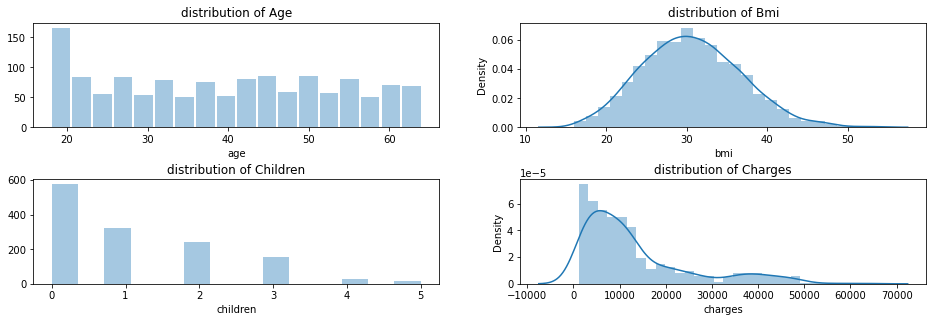

In [518]:
plt.figure(figsize=(16,5))
plt.subplots_adjust(top=0.85, hspace=0.5)

plt.subplot(2,2,1)
plt.title('distribution of Age')
sns.distplot(df.age, kde=False,  hist_kws={'rwidth': 0.9}, bins=18);

plt.subplot(2,2,2)
plt.title('distribution of Bmi')
sns.distplot(df.bmi, kde=True);

plt.subplot(2,2,3)
plt.title('distribution of Children')
sns.distplot(df.children, kde=False);

plt.subplot(2,2,4)
plt.title('distribution of Charges')
sns.distplot(df.charges, kde=True);


In [519]:
df.describe().T

count      mean       std      min      25%      50%       75%  \
age      1338.000    39.207    14.050   18.000   27.000   39.000    51.000   
bmi      1338.000    30.663     6.098   15.960   26.296   30.400    34.694   
children 1338.000     1.095     1.205    0.000    0.000    1.000     2.000   
charges  1338.000 13270.422 12110.011 1121.874 4740.287 9382.033 16639.913   

               max  
age         64.000  
bmi         53.130  
children     5.000  
charges  63770.428

- Age √∂zniteliƒüi i√ßin yeni bir √∂zellik eklenebilir √ß√ºnk√º √ºniform bir daƒüƒ±lƒ±m g√∂steriyor modelimiz sorun olabilir(yeni bir kategorik √∂zellik eklenebilir)
- Charges √∂zniteli saƒüa √ßarpƒ±k aykƒ±rƒ± g√∂zlemleri baskƒ±layabiliriz ya da normalize edebiliriz
- BMI normal daƒüƒ±lƒ±m g√∂stermi≈ü

age        0.299
bmi        0.198
children   0.068
charges    1.000
Name: charges, dtype: float64


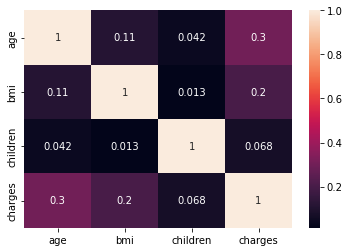

In [520]:
# Korelasyon incelemesi
sns.heatmap(df.corr(), annot=True)
print(df.corr()['charges'])

charges bizim hedef deƒüi≈ükenimiz bu y√ºzden diƒüer sayƒ±sal √∂znitelikler ile arasƒ±ndaki korelasyona baktƒ±k. Age ve BMI ile d√º≈ü√ºk pozitif korelasyon var diyebiliriz. Baƒüƒ±msƒ±z deƒüi≈ükenlerimiz arasƒ±nda doƒürusal baƒülantƒ± problemi yaratabilecek bir ili≈üki g√∂r√ºnm√ºyor 

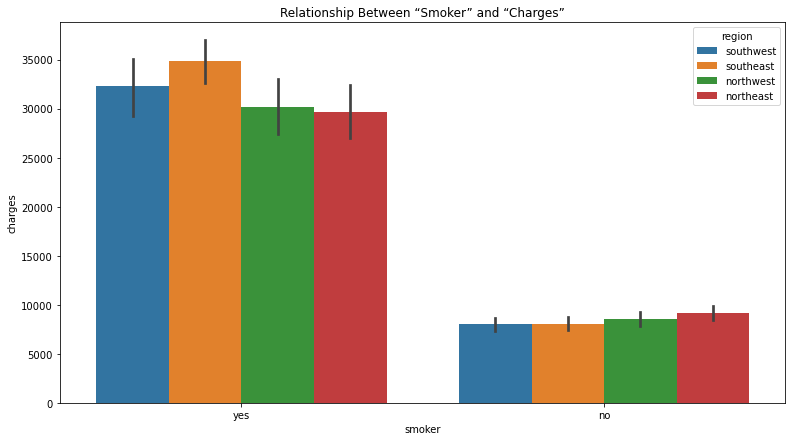

In [521]:
plt.figure(figsize=(13,7))
plt.title('Relationship Between ‚ÄúSmoker‚Äù and ‚ÄúCharges‚Äù')
sns.barplot(data=df, x=df['smoker'], y=df['charges'], hue='region');

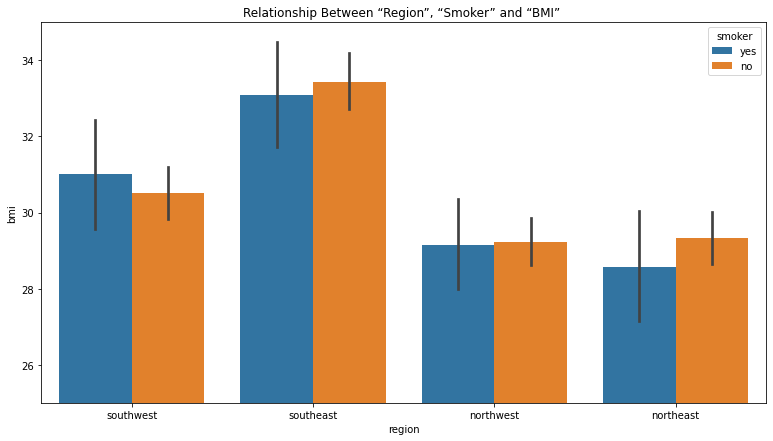

In [522]:
plt.figure(figsize=(13,7))
plt.title('Relationship Between ‚ÄúRegion‚Äù, ‚ÄúSmoker‚Äù and ‚ÄúBMI‚Äù ')
sns.barplot(data=df, x=df['region'], y=df['bmi'], hue='smoker');
plt.ylim(25,35);


## Data Preprocessing

In [523]:
# age ve bmi deƒüi≈ükenlerinde yeni kategorik deƒüi≈üken √ßƒ±kartma 
age_cat = ["0-18", "18-30", "30-45", "45-60", "60+"]

df["age_group"] = pd.cut(df["age"], bins=[0, 18, 30, 45, 60, 99], labels=age_cat, right=False)

bmi_cat = ['Underweight', 'Normal', 'Overweight', 'Obese (Class I)', 'Obese (Class II)',
           'Obese (Class III)']
df['bmi_group'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 99], labels=bmi_cat, right=False)

# Kategorik deƒüi≈ükenlerin one-hot d√∂n√º≈ü√ºm√º

df = pd.get_dummies(df,
                            columns=['sex','smoker','region', 'age_group','bmi_group'],
                            prefix=['sex','smoker','region', 'age_group','bmi_group'],
                            drop_first=True)
df.head()

age    bmi  children   charges  sex_male  smoker_yes  region_northwest  \
0   19 27.900         0 16884.924         0           1                 0   
1   18 33.770         1  1725.552         1           0                 0   
2   28 33.000         3  4449.462         1           0                 0   
3   33 22.705         0 21984.471         1           0                 1   
4   32 28.880         0  3866.855         1           0                 1   

   region_southeast  region_southwest  age_group_18-30  age_group_30-45  \
0                 0                 1                1                0   
1                 1                 0                1                0   
2                 1                 0                1                0   
3                 0                 0                0                1   
4                 0                 0                0                1   

   age_group_45-60  age_group_60+  bmi_group_Normal  bmi_group_Overweight  \
0                0              0                 0                     1   
1                0              0                 0                     0   
2                0              0                 0                     0   
3                0              0                 1                     0   
4                0              0                 0                     1   

   bmi_group_Obese (Class I)  bmi_group_Obese (Class II)  \
0                          0                           0   
1                          1                           0   
2                          1                           0   
3                          0                           0   
4                          0                           0   

   bmi_group_Obese (Class III)  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0

In [568]:
# Veri setinin Eƒüitim ve Test olarak ayƒ±rƒ±yoruz(test=0.2, eƒüitim=0.8)
y = df['charges']
X = df.drop(columns='charges', axis=1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


## Model Selection

In [569]:
# √áapraz doƒürulama 
def crossval(model):
    scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
    forest_reg_rmse_scores = np.sqrt(-scores)
    return forest_reg_rmse_scores.mean()

# Model Ba≈üarƒ± fonksiyonu
def basari(gercek, tahmin):
    rmse = mt.mean_squared_error(gercek,tahmin, squared=False)
    r2 = mt.r2_score(gercek, tahmin)
    return[rmse,r2]


In [570]:
# Linear regresyon
lr = LinearRegression()
linear_model = lr.fit(X_train,y_train)
linear_tahmin = linear_model.predict(X_test)

# Ridge Regresyon
ridge = Ridge()
ridge_model = ridge.fit(X_train, y_train)
ridge_tahmin = ridge_model.predict(X_test)

# Lasso Regresyon
lasso = Lasso()
lasso_model= lasso.fit(X_train, y_train)
lasso_tahmin = lasso_model.predict(X_test)

# ElasticNet Regresyon
elas = ElasticNet()
elas_model = elas.fit(X_train, y_train)
elas_tahmin = elas_model.predict(X_test)

# Decision Tree Regresyon
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model = tree_regressor.fit(X_train, y_train)
tree_tahmin = tree_model.predict(X_test)

# Random Forest Regresyon
random_for = RandomForestRegressor(random_state=42)
Forest_model = random_for.fit(X_train,y_train)
RandomForest_tahmin = Forest_model.predict(X_test)


In [572]:
results = [['Linear Model', basari(y_test,linear_tahmin)[0],basari(y_test,linear_tahmin)[1],crossval(linear_model)],
           ['Ridge Model', basari(y_test,ridge_tahmin)[0],basari(y_test,ridge_tahmin)[1],crossval(ridge_model)],
           ['Lasso Model', basari(y_test,lasso_tahmin)[0],basari(y_test,lasso_tahmin)[1],crossval(lasso_model)],
           ['ElasticNet Model', basari(y_test,elas_tahmin)[0],basari(y_test,elas_tahmin)[1],crossval(elas_model)],
           ['Random Forest Model', basari(y_test, RandomForest_tahmin)[0], basari(y_test,RandomForest_tahmin)[1], crossval(Forest_model)],
           ['Decision Tree Model', basari(y_test,tree_tahmin)[0],basari(y_test,tree_tahmin)[1],crossval(tree_model)]]
           
columns = ['Model', 'RMSE', 'R2', 'Doƒürulama(cv)']

pd.set_option('display.float_format', '{:.3f}'.format)
results = pd.DataFrame(data=results,columns=columns)
results


Model     RMSE    R2  Doƒürulama(cv)
0         Linear Model 5795.377 0.784       6063.309
1          Ridge Model 5763.996 0.786       6065.861
2          Lasso Model 5783.119 0.785       6063.222
3     ElasticNet Model 9493.610 0.419       9440.048
4  Random Forest Model 4617.474 0.863       5011.246
5  Decision Tree Model 4776.261 0.853       4798.195

Modelimiz Random Forest olacak daha d√º≈ü√ºk bir rmse deƒüeri aldƒ±k ve r2 skoruda baya y√ºksek. ≈ûimdi Hiperparametre ayarƒ±nƒ± yapalƒ±m

## Hyper-parameter Optimization

In [555]:
# Random Forest i√ßin hiperparametre ayarƒ±
forest_param_grid = [
    { "n_estimators": [10, 20, 30, 40, 50], "max_depth": [3, 5, 7, 9, 11] }, 
    { "bootstrap": [False], "n_estimators": [3, 10], "max_depth": [3, 5, 7, 9, 11]}
]
forest_reg = RandomForestRegressor(random_state=42)

forest_grid_search = GridSearchCV(forest_reg, forest_param_grid, cv=5, scoring='neg_mean_squared_error', refit=True)
forest_grid_search.fit(X, y)
print("En iyi hiperparametre deƒüerleri:", forest_grid_search.best_params_)

En iyi hiperparametre deƒüerleri: {'max_depth': 5, 'n_estimators': 40}


In [573]:
random_for = RandomForestRegressor(random_state=42, max_depth=5,n_estimators = 40)
Forest_model = random_for.fit(X_train,y_train)
RandomForest_tahmin = Forest_model.predict(X_test)
final_basari= basari(y_test, RandomForest_tahmin)

## Model Evaluation

In [574]:
test_veriler = y_test
tahmin_veriler = RandomForest_tahmin
x_degerleri = np.arange(len(test_veriler))

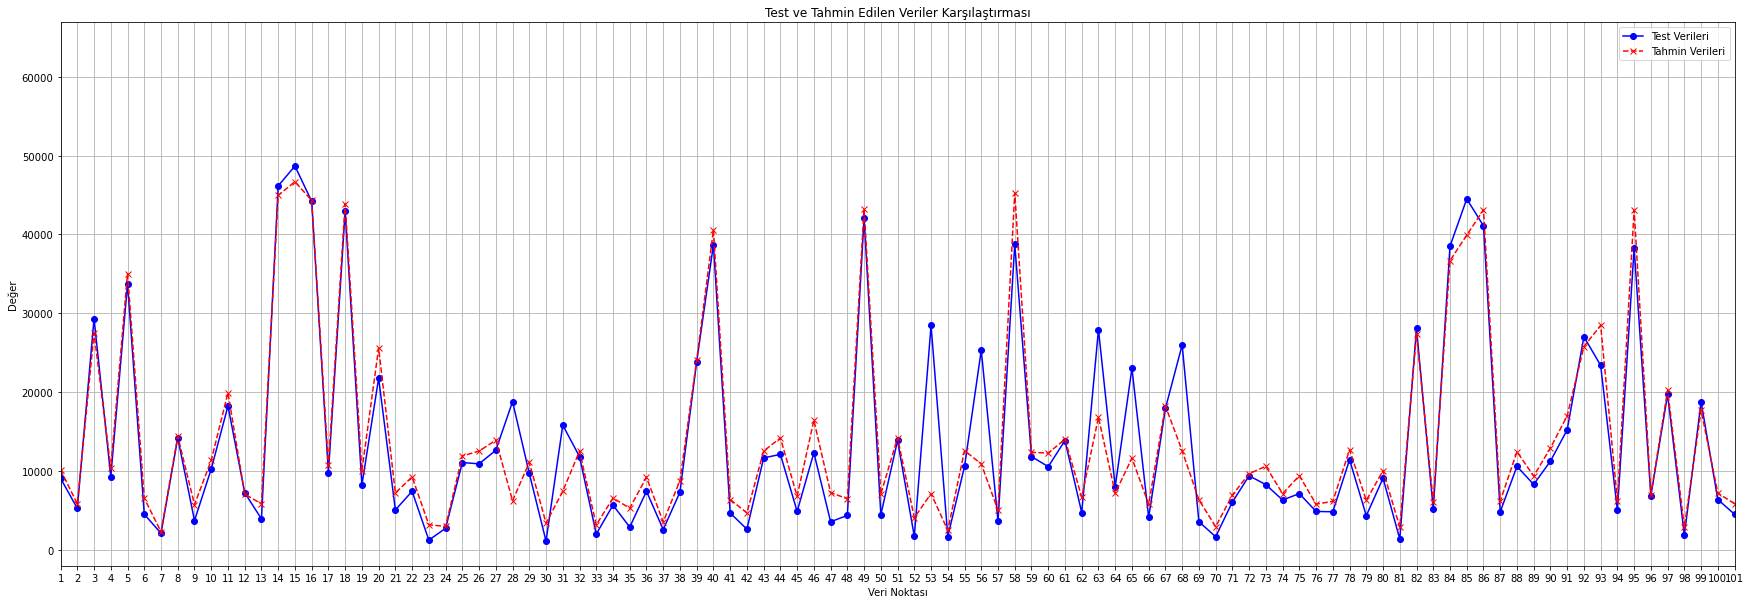

In [575]:
plt.figure(figsize=(30, 10))
plt.plot(x_degerleri, test_veriler, marker='o', color='blue', label='Test Verileri')
plt.plot(x_degerleri, tahmin_veriler, marker='x', color='red', linestyle='dashed', label='Tahmin Verileri')
plt.xticks(x_degerleri, x_degerleri + 1)  # x ekseni etiketleri
plt.xlabel('Veri Noktasƒ±')
plt.ylabel('Deƒüer')
plt.title('Test ve Tahmin Edilen Veriler Kar≈üƒ±la≈ütƒ±rmasƒ±')
plt.xlim(0,100)
plt.legend()
plt.grid(True)
plt.show()

In [578]:
print(f'RMSE: {final_basari[0]}\nR2 Skor: {final_basari[1]}')

RMSE: 4436.725139959536
R2 Skor: 0.8732065004435026


Thank you for taking the time to explore my first Kaggle Notebooküòä